In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
#Exception case for using sklearn: to split the dataset
from sklearn import model_selection

In [ ]:
#Create a simple dataset 
X =pd.DataFrame( np.linspace(0.1,1,1001))
test = X
test[test >=0.85] = 1
test[test < 0.85] = 0
# thus the dataset is such that if observation is > =0.65, it is a positive case
Y = test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)
X_train.insert(0,'ones',np.ones(Y_train.shape))
#how balanced is the dataset
print("Positive Class count: ",X_train[X_train[X_train.columns[1]]==1].count()[0])
print("Negative Class count: ",X_train[X_train[X_train.columns[1]]==0].count()[0])

Positive Class count:  124
Negative Class count:  626


In [41]:
def Logistic_Regression(X_train, Y_train, alpha=0.001, iter=100):
 theta = np.ones(X_train.shape[1]) / 100
 J = np.ones(X_train.shape[0]) 
 theta.reshape(X_train.shape[1],1)
 Rl=[]
 
 m= X_train.shape[0]
 for iteration in range(iter):
  ht= (theta*X_train).sum(axis=1)
  Yp =1/(1+np.exp(-ht))
  for i in range(X_train.shape[0]):
   J[i] = -(Y_train.values[i] * np.log(Yp.values[i])) -((1-Y_train.values[i])*np.log(1-Yp.values[i]))
  Rl.append(J.sum())
  err= Yp- Y_train
  err = err[0]
  theta= theta - (alpha*(X_train.T.dot(err)))/m
 return theta, Rl, iter
params=Logistic_Regression(X_train, Y_train,2,30)

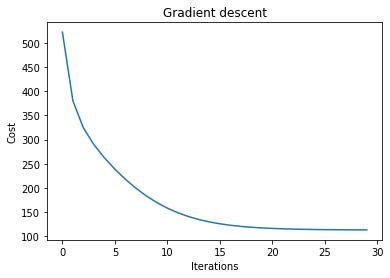

In [42]:
plt.title("Gradient descent")
X= np.arange(params[2])
plt.plot(X,params[1])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
def predict(x = X_test,theta = params[0]):
 ht= (theta * x).sum(axis=1)
 y =1/(1+np.exp(-ht))
 return y

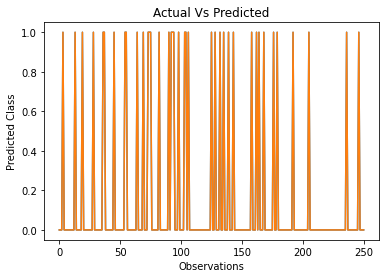

In [ ]:
#Test the model
# change for X observations
X_tr = X_test
Yp = predict(X_tr)
# change for y responses
Y_tr = Y_test
#Change threshold value to get improve performance
Yp[Yp>0.5] = 1
Yp[Yp<=0.5] = 0
X_terms = np.arange(X_tr.shape[0])
#some fun visualization
plt.title('Actual Vs Predicted')
plt.xlabel('Observations')
plt.ylabel('Predicted Class')
plt.plot(X_terms, Yp)
plt.plot(X_terms, Y_tr)
plt.show()

Model Metrics:

In [ ]:
Predictions = pd.DataFrame(Y_tr.values)
Predictions.insert(1,1,Yp.values)
Predictions.columns=['Actual','Predicted']
# Metric calculations 
TP=Predictions[(Predictions['Actual'] == 1 ) & (Predictions['Predicted'] == 1)].count()[0]
TN=Predictions[(Predictions['Actual'] == 0) & (Predictions['Predicted'] == 0)].count()[0]
FP=Predictions[(Predictions['Actual'] == 0 ) & (Predictions['Predicted'] == 1)].count()[0]
FN=Predictions[(Predictions['Actual'] == 1 ) & (Predictions['Predicted'] == 0)].count()[0]
# Create the confusion Matrix 
confusion = pd.DataFrame(np.array([[TP, FP],[FN,TN]]))
confusion.columns = ['Actual_Positives','Actual_Negatives']
confusion.index = ['Predicted_Positives','Predicted_Negatives']
Predicted_Positive= TP + FP
Predicted_Negative= TN + FN
Actual_Positive= TP + FN
Actual_Negative= TN + FP
Accuracy= (TP + TN)/(Actual_Positive + Actual_Negative)
Precision= TP / Predicted_Positive
#Recall or Sensitivity
Recall = TP / Actual_Positive
Specificity = TN / Actual_Negative
F1_Score = (2*Precision * Recall) / (Precision + Recall)

 Print all the metrics

In [ ]:
a = np.array([[True_Positives, False_Positives],[False_Negatives,True_Negatives]])
print(confusion)


                     Actual_Positives  Actual_Negatives
Predicted_Positives                39                 0
Predicted_Negatives                 0               212


In [ ]:
 print('Accuracy: ',Accuracy)
print('Precision: ', Precision)
print('Recall: ',Recall)
print('Specificity: ', Specificity)
print('F1_score: %.2F'%F1_Score)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
F1_score: 1.00
